# Multiple Linear Regression Bike Sharing Assignment

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

### Reading and Understanding the Data

In [2]:
bikeSharingDf = pd.read_csv('day.csv')
bikeSharingDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#check the shape
bikeSharingDf.shape

(730, 16)

In [4]:
#check dataframe for null and datatype 
bikeSharingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#summary of all the numeric columns
bikeSharingDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking missing values
bikeSharingDf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values

## Cleaning Data

#### Drop columns that are not useful for analysis

In [7]:
#Checking the unique values in the data
bikeSharingDf.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [8]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharingDf.drop(['instant'], axis = 1, inplace = True)

In [26]:
#drop unnecessary columns
bikeSharingDf=bikeSharingDf.drop(['casual', 'registered','atemp'], axis=1)


### Bikeshares for weekend vs weekdays


<AxesSubplot:ylabel='cnt'>

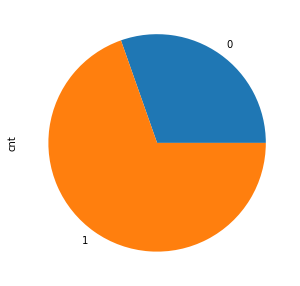

In [9]:
plt.figure(figsize=(5,5))
bikeSharingDf.groupby(["workingday"])["cnt"].sum().plot.pie()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


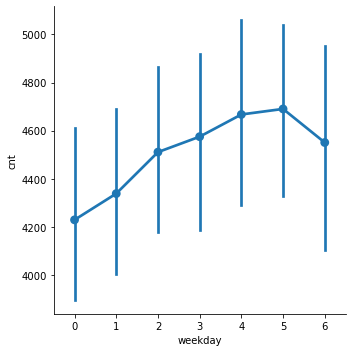

In [10]:
g = sns.factorplot(data = bikeSharingDf,
               x = "weekday",
               y = "cnt", 
               ci = 95
               )

#### Inferance

Bike sharing happens more on Thursday and Friday

### Bikeshares during different weather conditions


In [11]:
bikeSharingDf['weathersit']=bikeSharingDf.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})


<AxesSubplot:ylabel='cnt'>

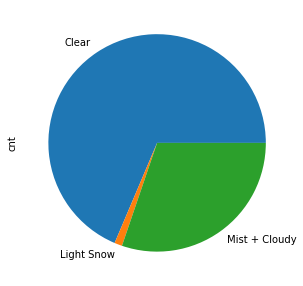

In [12]:
plt.figure(figsize=(5,5))
bikeSharingDf.groupby(["weathersit"])["cnt"].sum().plot.pie()

### Inferance 

Bike sharing is more when weather is clear or Few clouds

### Bikeshares during different seasons


In [13]:
bikeSharingDf['season']=bikeSharingDf.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })


<AxesSubplot:ylabel='cnt'>

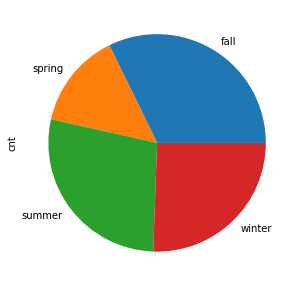

In [14]:
plt.figure(figsize=(5,5))
bikeSharingDf.groupby(["season"])["cnt"].sum().plot.pie()


<AxesSubplot:xlabel='season'>

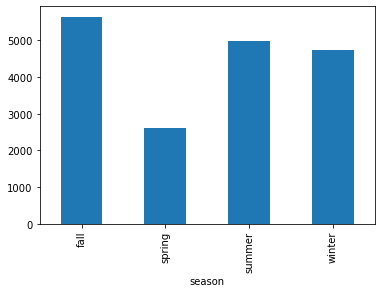

In [15]:
bikeSharingDf.groupby(["season"])["cnt"].mean().plot.bar()


### Inferance 

Bike sharing is more during fall, summer and winter.

### Year

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


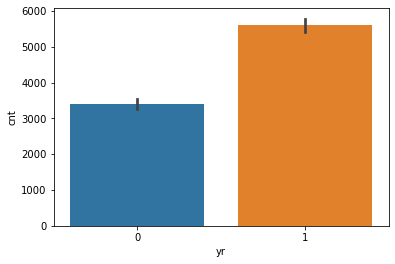

In [16]:
#Relation between Year and count of bike rentals
sns.barplot('yr','cnt',data=bikeSharingDf)
plt.show()

Bike rentals are more in the year 2019 compared to 2018

In [17]:
bikeSharingDf['mnth']=bikeSharingDf.mnth.map({1: 'Jan', 2: 'Feb',3:'Mar', 4:'Apr',5: 'May', 6: 'Jun',7:'Jul', 8:'Aug',9: 'Sep', 10: 'Oct',11:'Nov', 12:'Dec' })


In [18]:
#Before dropping date, let us introduce a daysOld variable which indicates how old is the business
bikeSharingDf['daysOld'] = (pd.to_datetime(bikeSharingDf['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [19]:
# Dropping dteday as we have already have month and weekday columns to work with
bikeSharingDf.drop(['dteday'], axis = 1, inplace = True)

In [20]:
#Inspect data frame after dropping
bikeSharingDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daysOld
0,spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


#### Handle Outliers

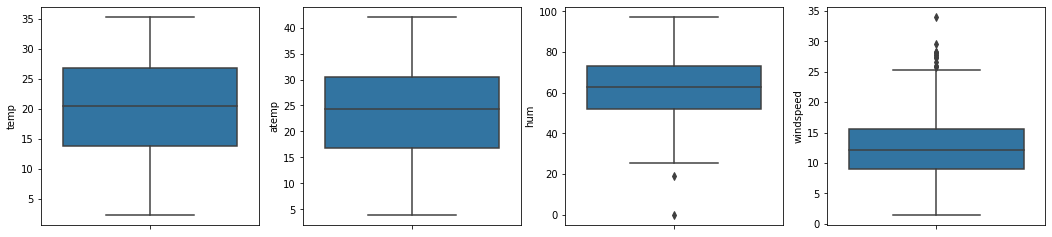

In [21]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharingDf)
    i+=1


In [22]:
#Mapping variables weekday

bikeSharingDf['weekday']=bikeSharingDf.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bikeSharingDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daysOld
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


#### Visualising Numeric Variables


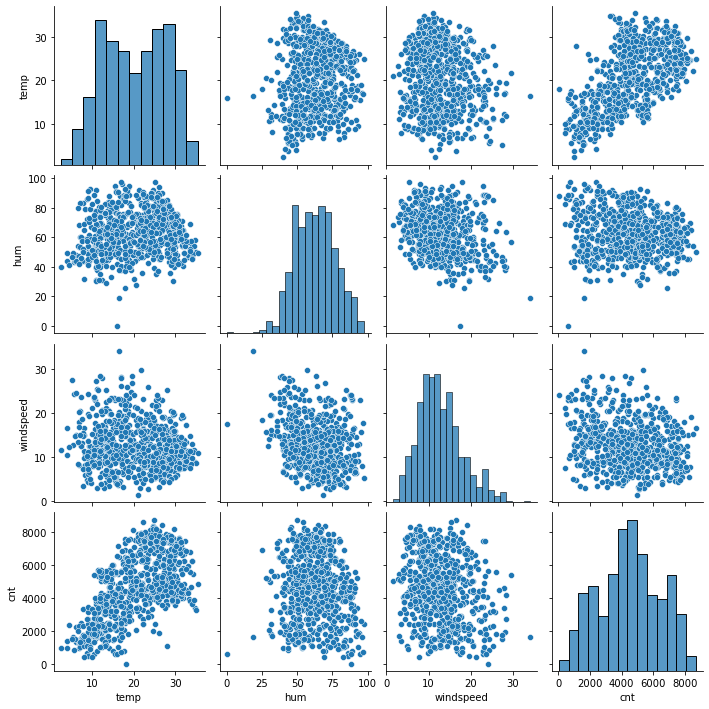

In [27]:
#Pairplot for numeric variables
sns.pairplot(bikeSharingDf, vars=["temp", "hum",'windspeed','cnt'])
plt.show()

Bike rentals are more correlated to temperature


temp, atemp variables show good amount of positive correlation with count.


### Visualising Categorical Variables


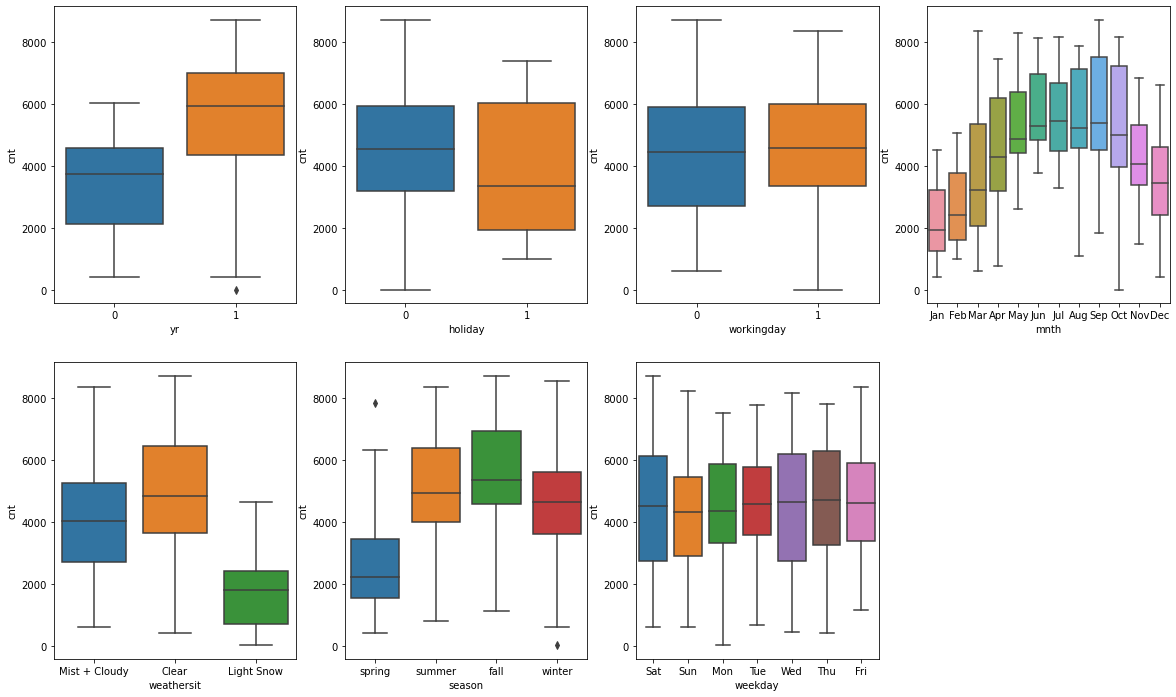

In [24]:
##Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharingDf)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharingDf)

plt.show()


##### Inferance

 Bike Rentals are more :
 1. during the Fall season and then in summer
 2. in the year 2019 compared to 2018
 3. in partly cloudy weather
 4. on Saturday,wednesday and thursday

#### Should polynomial transformation be performed?


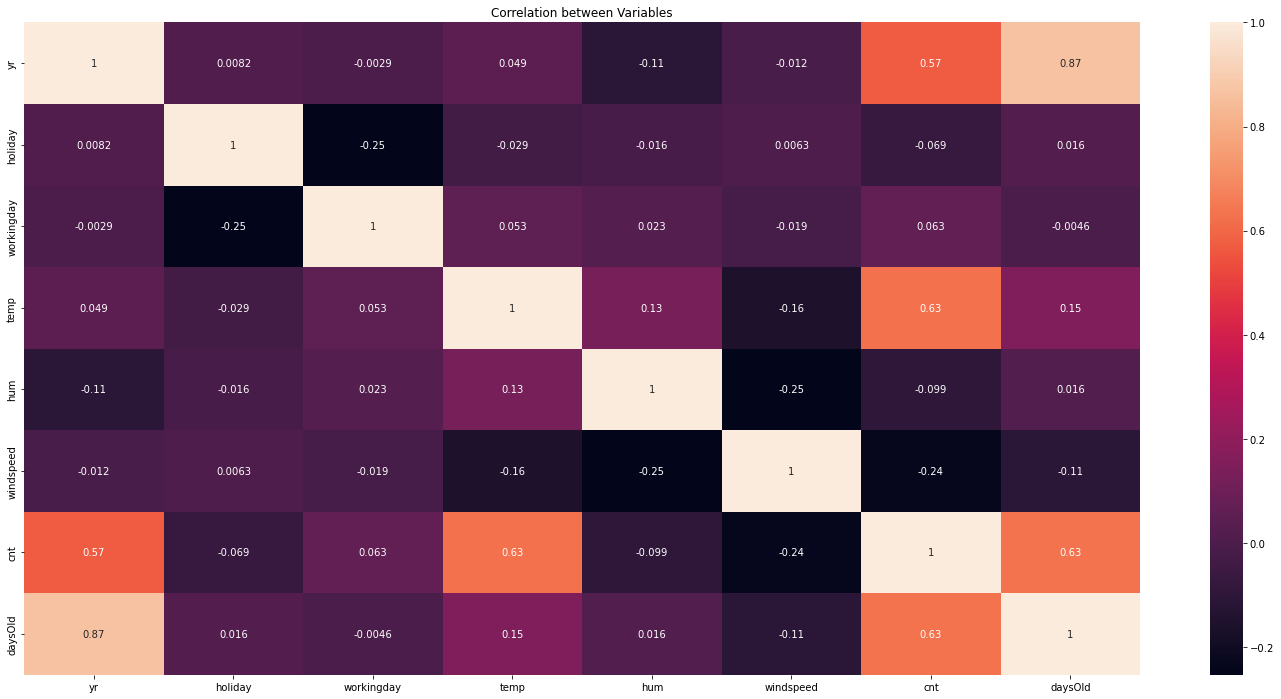

In [28]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bikeSharingDf.corr(), annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see temp , daysOld and yr are correlated to 'cnt' variable


# Model Building

### Data Preparation

In [29]:
bikeSharingDf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,daysOld
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,2
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,3
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,4


In [30]:
# # Get the dummy variables for month, season, weathersit, weekday and Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bikeSharingDf.mnth,drop_first=True)
weekdays=pd.get_dummies(bikeSharingDf.weekday,drop_first=True)
weather_sit=pd.get_dummies(bikeSharingDf.weathersit,drop_first=True)
seasons=pd.get_dummies(bikeSharingDf.season,drop_first=True)


In [31]:
# Add the results to the original bike dataframe
bikeSharingDf=pd.concat([months,weekdays,weather_sit,seasons,bikeSharingDf],axis=1)
bikeSharingDf.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,daysOld
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,0
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,2
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,3
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,4


In [32]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bikeSharingDf.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikeSharingDf.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt,daysOld
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,80.5833,10.749882,985,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,69.6087,16.652113,801,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,43.7273,16.636703,1349,2
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,59.0435,10.739832,1562,3
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,43.6957,12.522300,1600,4


In [33]:
#Number of rows and columns
bikeSharingDf.shape

(730, 30)

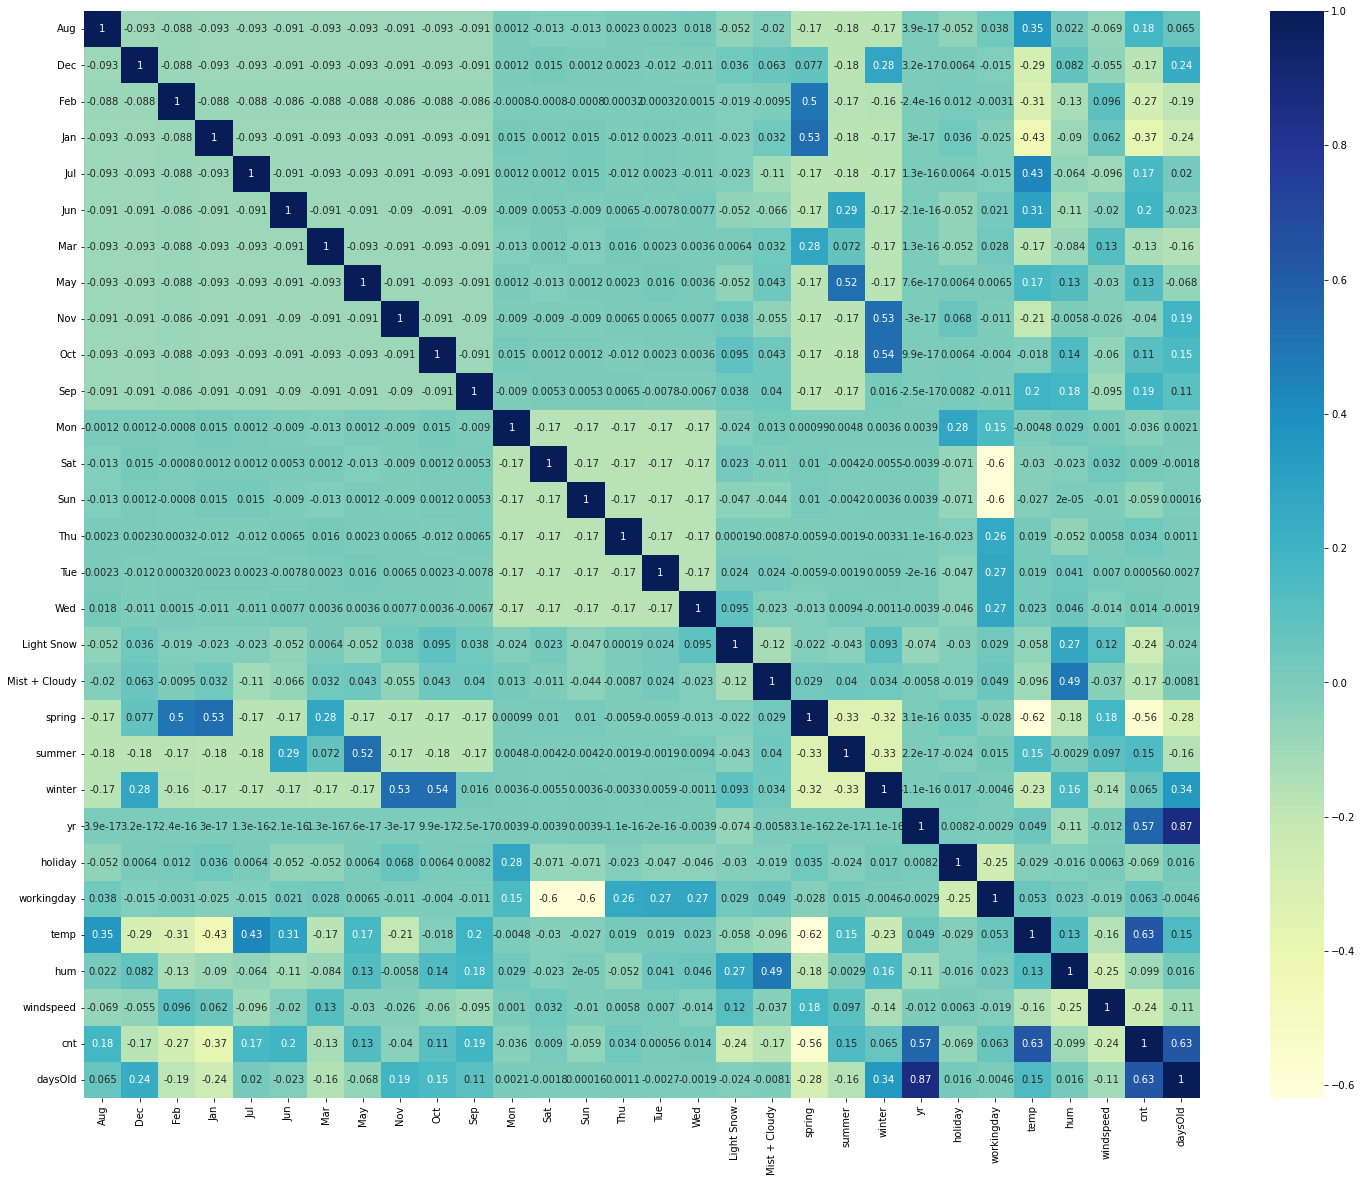

In [34]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(bikeSharingDf.corr(), cmap='YlGnBu', annot = True)
plt.show()

We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.



### Splitting the Data into Training and Testing Sets

In [35]:
bikeSharingDf.shape

(730, 30)

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
bike_train, bike_test = train_test_split(bikeSharingDf, train_size = 0.7, random_state = 100)


In [37]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features

In [38]:
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt,daysOld
576,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658,576
426,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255,426
728,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096,728
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973,482
111,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095,111


In [39]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt,daysOld
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,367.680392
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,209.596164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,186.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,372.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,551.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000


All the numeric variables are now mapped between 0 and 1



Multicollinearity: Assumes that predictors are not correlated with each other. If there is correlation among the predictors



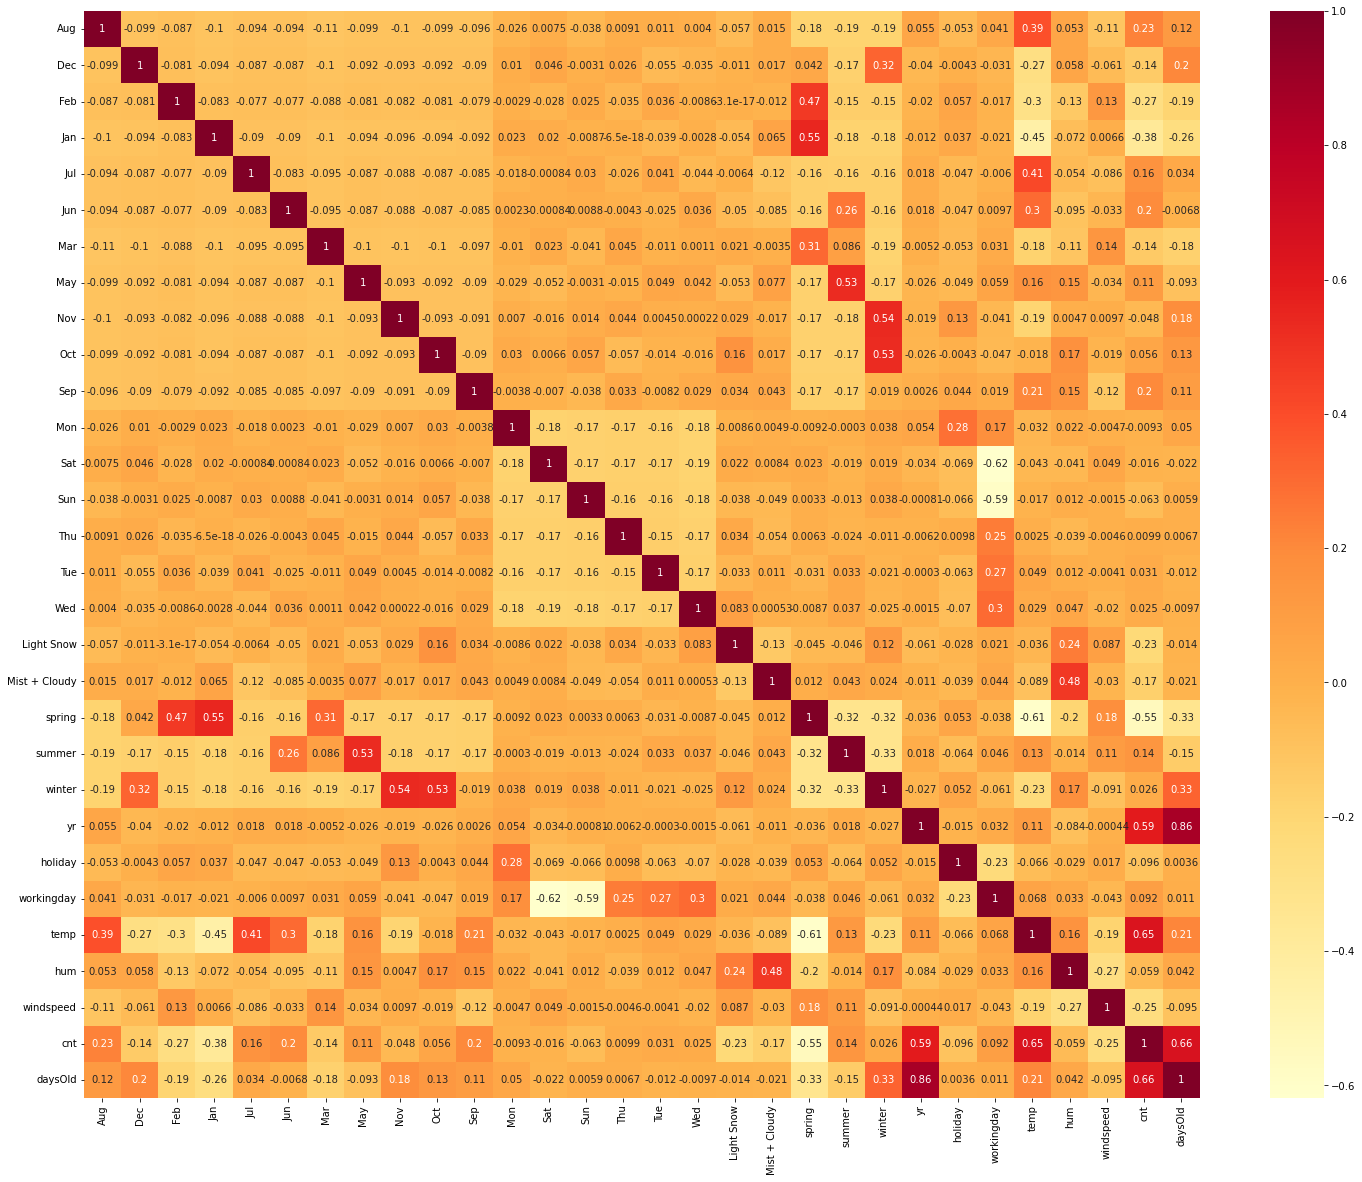

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

From the heatmap we can see temp, year are correlated to the 'count' variable.Even in August, September months we can see the counts are little high.

Dividing into X and Y sets for the model building

In [41]:
#Divide the data into X and y
y_train = bike_train.pop('cnt')
X_train = bike_train

### Building a linear model

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### Recursive Feature Elimination



In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [43]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('daysOld', False, 15)]

In [44]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jul', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [45]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed', 'daysOld'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [48]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          2.11e-191
Time:                        17:53:28   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is: 1 / ( 1 - R ^ 2 )



In [50]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,hum,1.91
5,Mist + Cloudy,1.57


Jul is insignificant in presence of other variables due to high p-value and low VIF; can be dropped



In [52]:
#Drop Jul
X_train_new1 = X_train_rfe.drop(["Jul"], axis = 1)



Rebuilding the model without 'Jul'

In [53]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.09e-189
Time:                        17:54:44   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.277e+12   8.22e+11     -1.553

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,49.97
1,Sat,12.02
2,Sun,11.60
5,spring,4.84
11,temp,3.53
7,winter,3.27
9,holiday,2.88
6,summer,2.29
12,hum,1.90
4,Mist + Cloudy,1.57


'workingday' variable can be dropped as its insignificant by looking at very high VIF

In [56]:
#Drop workingday
X_train_new2 = X_train_lm1.drop(["workingday"], axis = 1)

In [57]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.29e-190
Time:                        18:00:50   Log-Likelihood:                 512.96
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2710      0.034      7.935

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,28.25
10,temp,14.85
12,windspeed,4.68
5,spring,3.94
7,winter,3.20
6,summer,2.46
4,Mist + Cloudy,2.30
8,yr,2.08
0,Sep,1.28
3,Light Snow,1.24


In [60]:
#Drop the holiday column
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)


In [61]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.86e-188
Time:                        18:04:45   Log-Likelihood:                 505.02
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     497   BIC:                            -929.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2684      0.035      7.745

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
#Drop constant 
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [63]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
10,hum,28.24
9,temp,14.85
11,windspeed,4.67
5,spring,3.93
7,winter,3.18
6,summer,2.46
4,Mist + Cloudy,2.29
8,yr,2.08
0,Sep,1.27
3,Light Snow,1.24


In [64]:
#Drop humidity
X_train_new4 = X_train_lm3.drop(["hum"], axis = 1)

In [65]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          3.96e-186
Time:                        18:19:35   Log-Likelihood:                 496.68
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1926      0.030      6.494

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
#Drop the constant
X_train_lm4=X_train_lm4.drop(['const'],axis=1)

In [67]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,windspeed,4.62
9,temp,3.96
8,yr,2.07
5,spring,2.02
6,summer,1.91
7,winter,1.65
4,Mist + Cloudy,1.55
0,Sep,1.22
1,Sat,1.22
2,Sun,1.21


In [68]:
#Drop windspeed
X_train_new5= X_train_lm4.drop(['windspeed'], axis=1)

In [75]:
#Build a model
X_train_lm5=sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.3
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          8.08e-180
Time:                        18:41:22   Log-Likelihood:                 478.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     499   BIC:                            -889.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1427      0.029      4.846

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
#Drop constant
X_train_lm5= X_train_lm5.drop(['const'], axis=1)

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,3.06
8,yr,2.06
6,summer,1.64
4,Mist + Cloudy,1.55
7,winter,1.47
5,spring,1.37
0,Sep,1.22
1,Sat,1.21
2,Sun,1.21
3,Light Snow,1.07


### Residual Analysis of the train data


In [76]:
#X_train_lm5=sm.add_constant(X_train_lm5)
#X_train_lm5.columns
X_train_lm5

,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,yr,temp
576,1.0,0,0,0,0,0,0,0,0,1,0.815169
426,1.0,0,1,0,0,1,1,0,0,1,0.442393
728,1.0,0,0,1,0,0,1,0,0,1,0.245101
482,1.0,0,1,0,0,1,0,1,0,1,0.395666
111,1.0,0,0,0,0,1,0,1,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0.863973
53,1.0,0,0,0,0,0,1,0,0,0,0.202618
350,1.0,0,1,0,0,1,0,0,1,0,0.248216
79,1.0,0,0,0,0,1,0,1,0,0,0.462664


In [77]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

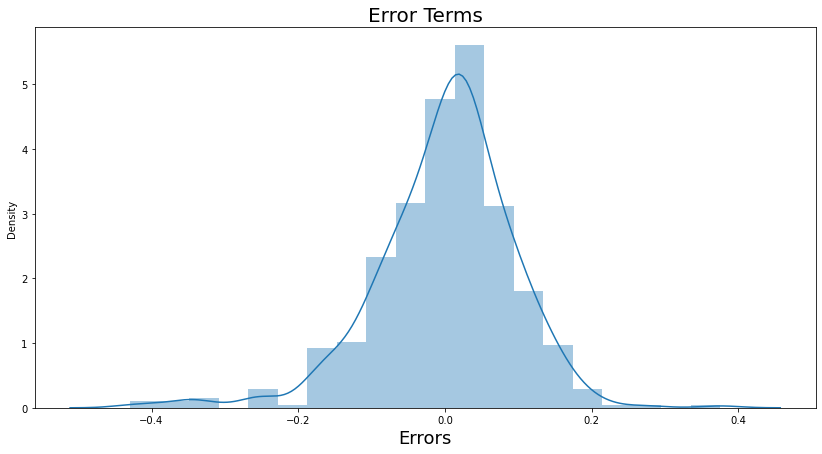

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

We can see Error terms are normally distributed



### Making Predictions

In [82]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,yr,holiday,workingday,temp,hum,windspeed,cnt,daysOld
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706,184
535,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034,535
299,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382,299
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400,221
152,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029,152


Dividing into X_test and y_test

In [83]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,temp,hum,windspeed,daysOld
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,357.127273
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,214.116582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,3.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,170.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,349.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,538.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,729.000000


In [84]:
#Columns
X_train_new5.columns

Index(['Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'yr', 'temp'],
      dtype='object')

In [85]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,yr,temp
184,1.0,0,0,0,0,1,0,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,1,0,1,0.901354
299,1.0,0,0,0,0,1,0,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,1,0,0,0.817246


In [86]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

Finding R-squared and Adjusted R-Squared for Test set

In [87]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8091827435956837

In [88]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

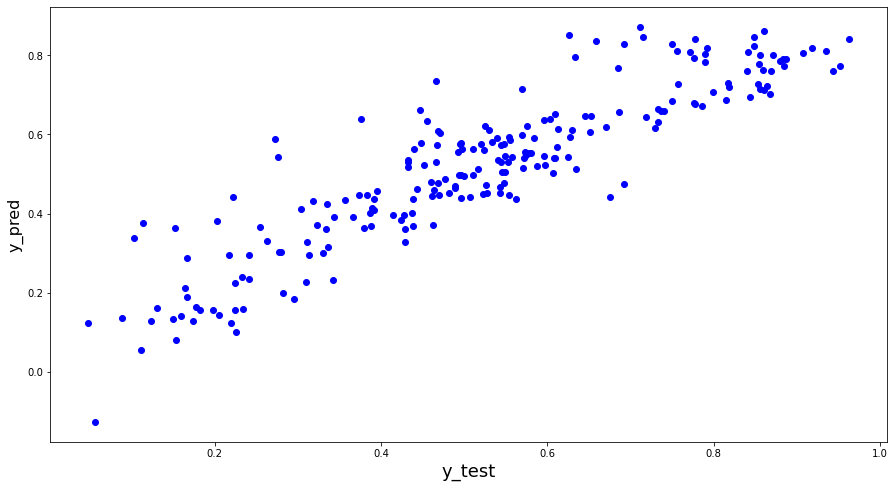

In [89]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


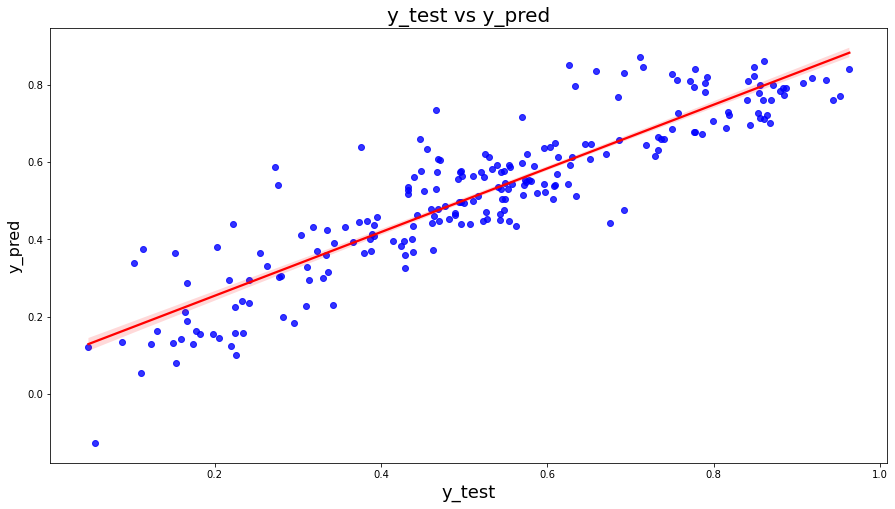

In [90]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:


    𝑐𝑜𝑢𝑛𝑡=0.4923×𝑡𝑒𝑚𝑝+0.0900×𝑆𝑒𝑝𝑡𝑒𝑚𝑏𝑒𝑟+0.0119×𝑆𝑎𝑡𝑢𝑟𝑑𝑎𝑦+0.0526×𝑠𝑢𝑚𝑚𝑒𝑟+0.0948×𝑤𝑖𝑛𝑡𝑒𝑟+0.2337×𝑌𝑒𝑎𝑟-0.3007×𝑙𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤-0.0772×𝑚𝑖𝑠𝑡𝑐𝑙𝑜𝑢𝑑𝑦-0.0667×𝑠𝑝𝑟𝑖𝑛𝑔

## Final Result Comparison between Train model and Test:

- Train R ^ 2 : 0.822
- Train Adjusted R^2 : 0.818
- Test R^2: 0.8091
- Test Adjusted R^2: 0.7905
- Difference in R^2 between train and test: 1.5%
- Difference in adjusted R^2 between Train and test: 3.15% which is less than 5%¶


In [ ]:
Train Adjusted R^2 : 0.818
Test R^2: 0.8091
Test Adjusted R^2: 0.7905
Difference in R^2 between train and test: 1.5%
Difference in adjusted R^2 between Train and test: 3.15% which is less than 5%¶

### Interpretation

- We can see that temperature variable is having the highest coefficient 0.4923, which means if the temperature increases by one unit the number of bike rentals increases by 0.4914 units.¶


- We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

### Business Goals

- A US bike-sharing provider BoomBikes can focus more on Temperature

- We can see demand for bikes was more in 2019 than 2018, so demand will more for coming years as reach of the company increases.

- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.

- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can reduce the number of bike during winter season.

- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather, reduce number of bike or more offer.